In [1]:
import random
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns

# 건물 각각의 월 별 전력 소비량

In [3]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
train_df = train_df.fillna(0)

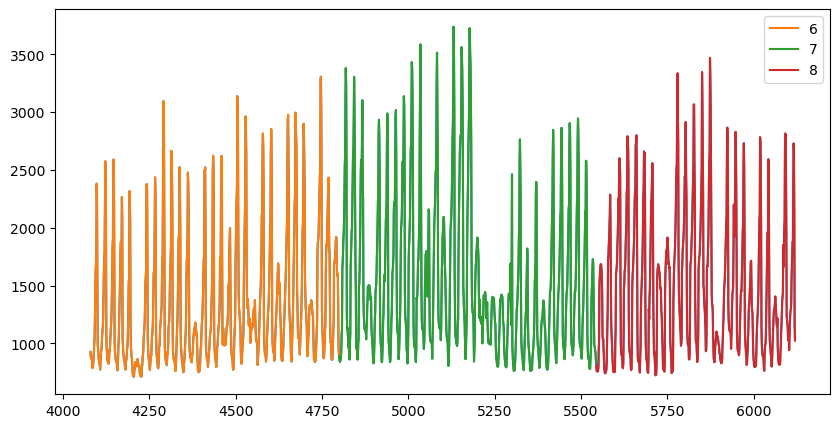

In [102]:
df = train_df[train_df['건물번호'] == 3]

plt.figure(figsize=(10,5))
plt.plot(df['전력소비량(kWh)'])
plt.plot(df.iloc[:24*30]['전력소비량(kWh)'], label='6')
plt.plot(df.iloc[24*30:(24*30 + 24*31)]['전력소비량(kWh)'], label='7')
plt.plot(df.iloc[(24*30 + 24*31):(24*30 + 24*31 + 24*24)]['전력소비량(kWh)'], label='8')
plt.legend()
plt.show()

In [25]:
train_df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,0.0,0.9,42.0,0.0,0.0,1085.28
1,1_20220601 01,1,20220601 01,18.0,0.0,1.1,45.0,0.0,0.0,1047.36
2,1_20220601 02,1,20220601 02,17.7,0.0,1.5,45.0,0.0,0.0,974.88
3,1_20220601 03,1,20220601 03,16.7,0.0,1.4,48.0,0.0,0.0,953.76
4,1_20220601 04,1,20220601 04,18.4,0.0,2.8,43.0,0.0,0.0,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,0.0,0.9,86.0,0.5,0.0,881.04
203996,100_20220824 20,100,20220824 20,22.4,0.0,1.3,86.0,0.0,0.0,798.96
203997,100_20220824 21,100,20220824 21,21.3,0.0,1.0,92.0,0.0,0.0,825.12
203998,100_20220824 22,100,20220824 22,21.0,0.0,0.3,94.0,0.0,0.0,640.08


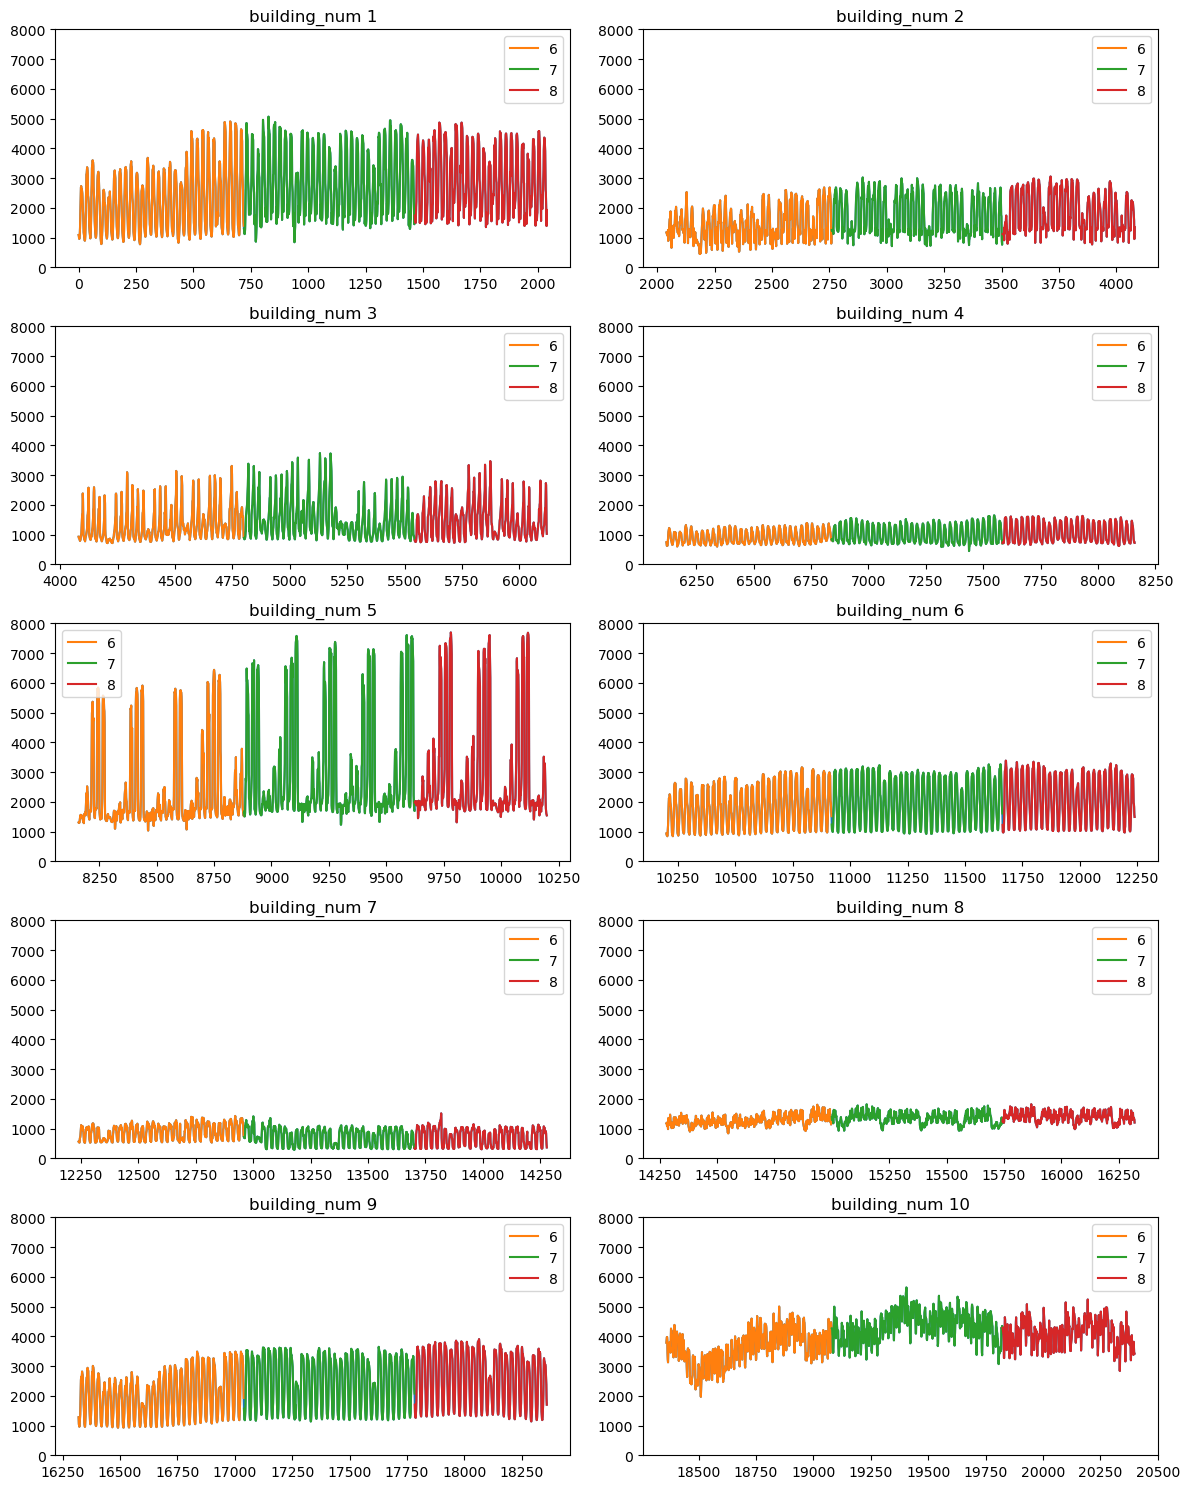

In [36]:
import matplotlib.pyplot as plt

# Assuming you have a list of building numbers from 1 to 10
building_numbers = list(range(1, 11))
import matplotlib.pyplot as plt

# Assuming you have a list of building numbers from 1 to 10
building_numbers = list(range(1, 11))

# Create a 5x2 grid of subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 15))

for i, building_num in enumerate(building_numbers):
    df = train_df[train_df['건물번호'] == building_num]
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    ax.plot(df['전력소비량(kWh)'])
    ax.plot(df.iloc[:24*30]['전력소비량(kWh)'], label='6')
    ax.plot(df.iloc[24*30:(24*30 + 24*31)]['전력소비량(kWh)'], label='7')
    ax.plot(df.iloc[(24*30 + 24*31):(24*30 + 24*31 + 24*24)]['전력소비량(kWh)'], label='8')
    ax.set_ylim(0, 8000)
    ax.set_title(f'building_num {building_num}')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


# 건물 별 에너지 사용 평균

In [2]:
def mean_of_power_per_building(df):
    train_df = pd.read_csv('./train.csv')
    train_df = train_df.rename(columns={
        '건물번호': 'building_number',
        '일시': 'date_time',
        '기온(C)': 'temperature',
        '강수량(mm)': 'rainfall',
        '풍속(m/s)': 'windspeed',
        '습도(%)': 'humidity',
        '일조(hr)': 'sunshine',
        '일사(MJ/m2)': 'solar_radiation',
        '전력소비량(kWh)': 'power_consumption'
    })
    train_df = train_df.fillna(0)
    train_df.drop('num_date_time', axis = 1, inplace=True)

    train_df['date_time'] = pd.to_datetime(train_df['date_time'])
    train_df['year'] = train_df['date_time'].dt.year
    train_df['month'] = train_df['date_time'].dt.month
    train_df['day'] = train_df['date_time'].dt.day
    train_df['hour'] = train_df['date_time'].dt.hour
    train_df['day_of_year'] = train_df['date_time'].dt.dayofyear
    train_df['weekday'] = train_df['date_time'].dt.day_name()
    train_df['date_time'] = train_df['date_time'].dt.date

    lst = [train_df[train_df['building_number'] == i]['power_consumption'].mean() for i in range(1,101)]

    plt.plot(list(range(1,101)), lst)
    plt.xticks([1,10,20,30,40,50,60,70,80,90,100])
    plt.gca().grid(False)
    plt.title('mean consumption per building')
    
    cnt = 0
    for x in sorted(lst, reverse=True)[:3]:
        cnt += 1
        print('top {}: building {}, (mean : {})'.format(str(cnt), str(lst.index(x)), str(int(x))))
    return plt.show()

#     cnt = 0
#     for x in sorted(lst, reverse=True)[:3]:
#         cnt += 1
#         print('top {}: building {}, (mean : {})'.format(str(cnt), str(lst.index(x)), str(int(x))))

top 1: building 26, (mean : 17453)
top 2: building 23, (mean : 10043)
top 3: building 31, (mean : 9865)


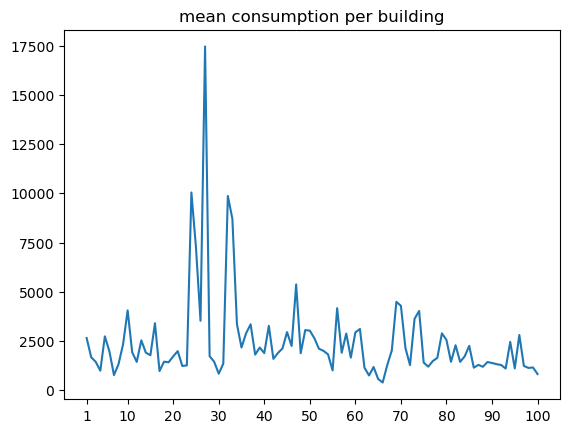

In [5]:
mean_of_power_per_building(train_df)

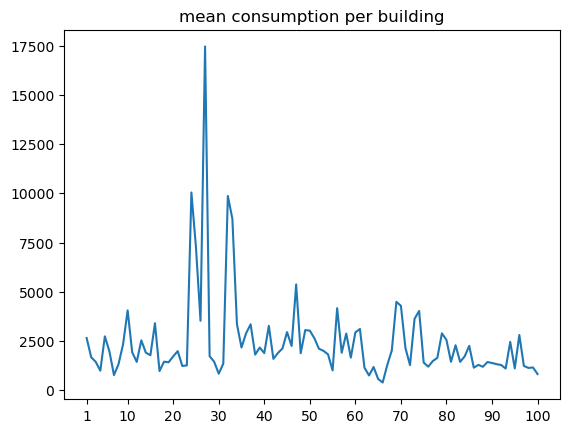

top 1: building 26, (mean : 17453)
top 2: building 23, (mean : 10043)
top 3: building 31, (mean : 9865)


In [3]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

train_df = train_df.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train_df = train_df.fillna(0)
train_df.drop('num_date_time', axis = 1, inplace=True)

train_df['date_time'] = pd.to_datetime(train_df['date_time'])
train_df['year'] = train_df['date_time'].dt.year
train_df['month'] = train_df['date_time'].dt.month
train_df['day'] = train_df['date_time'].dt.day
train_df['hour'] = train_df['date_time'].dt.hour
train_df['day_of_year'] = train_df['date_time'].dt.dayofyear
train_df['weekday'] = train_df['date_time'].dt.day_name()
train_df['date_time'] = train_df['date_time'].dt.date

lst = [train_df[train_df['building_number'] == i]['power_consumption'].mean() for i in range(1,101)]

plt.plot(list(range(1,101)), lst)
plt.xticks([1,10,20,30,40,50,60,70,80,90,100])
plt.gca().grid(False)
plt.title('mean consumption per building')
plt.show()

cnt = 0
for x in sorted(lst, reverse=True)[:3]:
    cnt += 1
    print('top {}: building {}, (mean : {})'.format(str(cnt), str(lst.index(x)), str(int(x))))

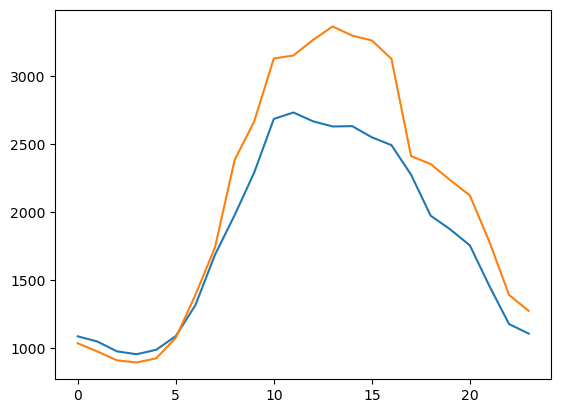

In [8]:
plt.plot(list(range(24)),df.iloc[:24]['전력소비량(kWh)'])
plt.plot(list(range(24)),df.iloc[24:48]['전력소비량(kWh)'])

In [9]:
df['일시'] = pd.to_datetime(df['일시'])
df

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
num_date_time,,,,,,,,,
1_20220601 00,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,0.0,0.00,1085.28
1_20220601 01,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,0.0,0.00,1047.36
1_20220601 02,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,0.0,0.00,974.88
1_20220601 03,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,0.0,0.00,953.76
1_20220601 04,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,0.0,0.00,986.40
...,...,...,...,...,...,...,...,...,...
1_20220824 19,1,2022-08-24 19:00:00,25.5,0.0,2.9,63.0,0.1,0.19,2517.12
1_20220824 20,1,2022-08-24 20:00:00,25.0,0.0,2.6,66.0,0.0,0.01,2208.96
1_20220824 21,1,2022-08-24 21:00:00,24.6,0.0,1.3,67.0,0.0,0.00,1806.24


In [10]:
df

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
num_date_time,,,,,,,,,
1_20220601 00,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,0.0,0.00,1085.28
1_20220601 01,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,0.0,0.00,1047.36
1_20220601 02,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,0.0,0.00,974.88
1_20220601 03,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,0.0,0.00,953.76
1_20220601 04,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,0.0,0.00,986.40
...,...,...,...,...,...,...,...,...,...
1_20220824 19,1,2022-08-24 19:00:00,25.5,0.0,2.9,63.0,0.1,0.19,2517.12
1_20220824 20,1,2022-08-24 20:00:00,25.0,0.0,2.6,66.0,0.0,0.01,2208.96
1_20220824 21,1,2022-08-24 21:00:00,24.6,0.0,1.3,67.0,0.0,0.00,1806.24


In [11]:
df['일시'].dt.dayofyear

num_date_time
1_20220601 00    152
1_20220601 01    152
1_20220601 02    152
1_20220601 03    152
1_20220601 04    152
                ... 
1_20220824 19    236
1_20220824 20    236
1_20220824 21    236
1_20220824 22    236
1_20220824 23    236
Name: 일시, Length: 2040, dtype: int64

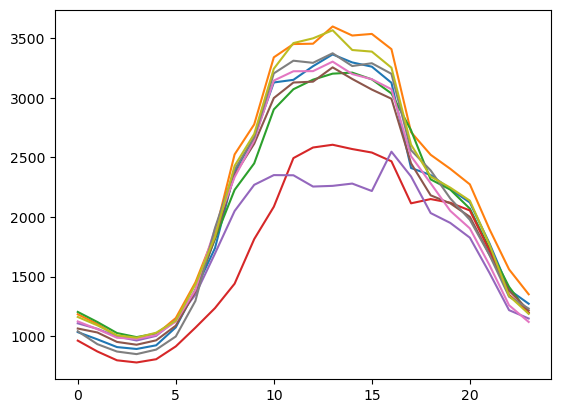

In [12]:
for i in range(1,10):
    plt.plot(list(range(24)),df.iloc[i*24:(i+1)*24]['전력소비량(kWh)'])

In [43]:
train_df

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,year,month,day,hour,day_of_year,weekday
0,1,2022-06-01,18.6,0.0,0.9,42.0,0.0,0.0,1085.28,2022,6,1,0,152,Wednesday
1,1,2022-06-01,18.0,0.0,1.1,45.0,0.0,0.0,1047.36,2022,6,1,1,152,Wednesday
2,1,2022-06-01,17.7,0.0,1.5,45.0,0.0,0.0,974.88,2022,6,1,2,152,Wednesday
3,1,2022-06-01,16.7,0.0,1.4,48.0,0.0,0.0,953.76,2022,6,1,3,152,Wednesday
4,1,2022-06-01,18.4,0.0,2.8,43.0,0.0,0.0,986.40,2022,6,1,4,152,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24,23.1,0.0,0.9,86.0,0.5,0.0,881.04,2022,8,24,19,236,Wednesday
203996,100,2022-08-24,22.4,0.0,1.3,86.0,0.0,0.0,798.96,2022,8,24,20,236,Wednesday
203997,100,2022-08-24,21.3,0.0,1.0,92.0,0.0,0.0,825.12,2022,8,24,21,236,Wednesday
203998,100,2022-08-24,21.0,0.0,0.3,94.0,0.0,0.0,640.08,2022,8,24,22,236,Wednesday


In [44]:
train_df = train_df.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
#train_df.drop('num_date_time', axis = 1, inplace=True)

train_df['date_time'] = pd.to_datetime(train_df['date_time'])
train_df['year'] = train_df['date_time'].dt.year
train_df['month'] = train_df['date_time'].dt.month
train_df['day'] = train_df['date_time'].dt.day
train_df['hour'] = train_df['date_time'].dt.hour
train_df['day_of_year'] = train_df['date_time'].dt.dayofyear
train_df['weekday'] = train_df['date_time'].dt.day_name()

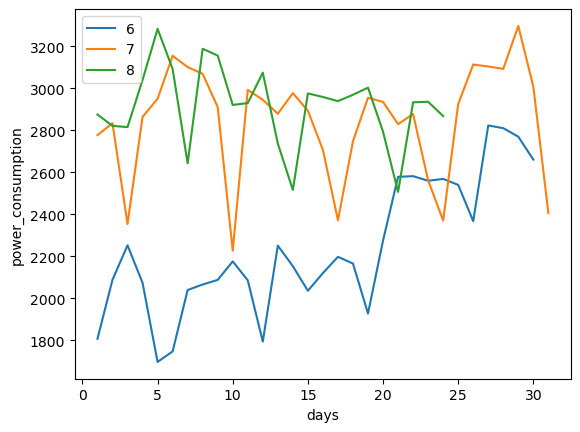

In [45]:
import matplotlib.pyplot as plt

# '건물번호'가 1이고 'month'가 6인 데이터 그래프
plt.plot(train_df[(train_df['building_number'] == 1) & (train_df['month'] == 6)].groupby('day')['power_consumption'].mean(), label='6')

# '건물번호'가 1이고 'month'가 7인 데이터 그래프
plt.plot(train_df[(train_df['building_number'] == 1) & (train_df['month'] == 7)].groupby('day')['power_consumption'].mean(), label='7')

# '건물번호'가 1이고 'month'가 8인 데이터 그래프
plt.plot(train_df[(train_df['building_number'] == 1) & (train_df['month'] == 8)].groupby('day')['power_consumption'].mean(), label='8')

# 그래프에 제목과 축 레이블 추가
plt.xlabel('days')
plt.ylabel('power_consumption')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


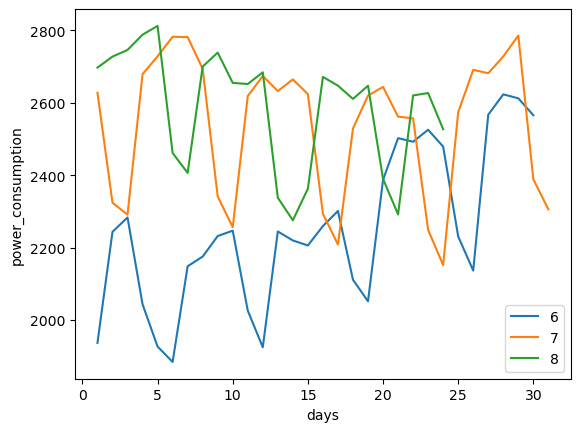

In [46]:
import matplotlib.pyplot as plt

# '건물번호'가 1이고 'month'가 6인 데이터 그래프
plt.plot(train_df[(train_df['month'] == 6)].groupby('day')['power_consumption'].mean(), label='6')

# '건물번호'가 1이고 'month'가 7인 데이터 그래프
plt.plot(train_df[(train_df['month'] == 7)].groupby('day')['power_consumption'].mean(), label='7')

# '건물번호'가 1이고 'month'가 8인 데이터 그래프
plt.plot(train_df[(train_df['month'] == 8)].groupby('day')['power_consumption'].mean(), label='8')

# 그래프에 제목과 축 레이블 추가
plt.xlabel('days')
plt.ylabel('power_consumption')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


# 10~16시 동안 max

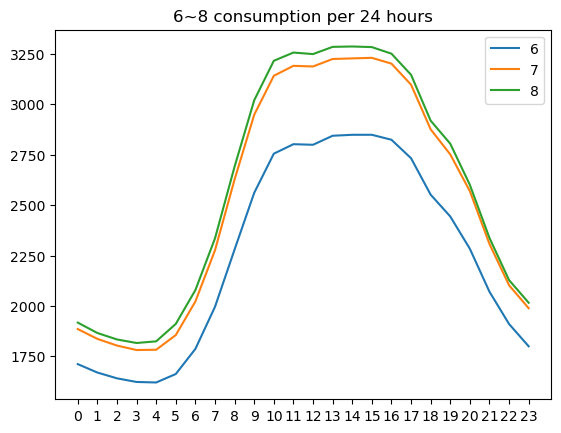

In [97]:
plt.plot(train_df[(train_df['month'] == 6)].groupby('hour')['power_consumption'].mean(),label='6')
plt.plot(train_df[(train_df['month'] == 7)].groupby('hour')['power_consumption'].mean(),label='7')
plt.plot(train_df[(train_df['month'] == 8)].groupby('hour')['power_consumption'].mean(),label='8')
plt.legend()
plt.xticks(list(range(24)))
plt.title('6~8 consumption per 24 hours')
plt.show()

In [54]:
def consumption_per_24hours(df):
    plt.plot(df[(df['month'] == 6)].groupby('hour')['power_consumption'].mean(),label='6')
    plt.plot(df[(df['month'] == 7)].groupby('hour')['power_consumption'].mean(),label='7')
    plt.plot(df[(df['month'] == 8)].groupby('hour')['power_consumption'].mean(),label='8')
    plt.legend()
    plt.xticks(list(range(24)))
    plt.title('6~8 consumption per 24 hours')
    return plt.show()

# 10~16시만

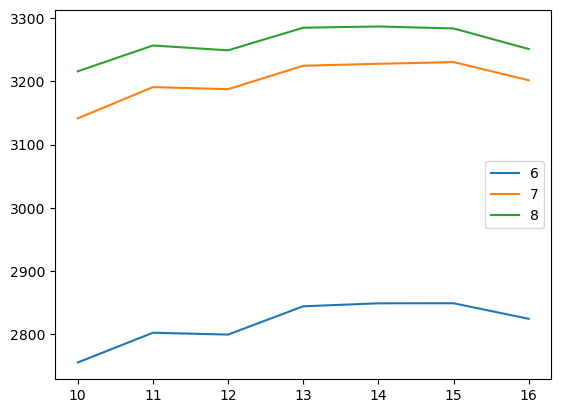

In [56]:
plt.plot(train_df[(train_df['month'] == 6) & (train_df['hour'] > 9) & (train_df['hour'] < 17)].groupby('hour')['power_consumption'].mean(),label='6')
plt.plot(train_df[(train_df['month'] == 7) & (train_df['hour'] > 9) & (train_df['hour'] < 17)].groupby('hour')['power_consumption'].mean(),label='7')
plt.plot(train_df[(train_df['month'] == 8) & (train_df['hour'] > 9) & (train_df['hour'] < 17)].groupby('hour')['power_consumption'].mean(),label='8')
plt.legend()
plt.show()

In [57]:
def only_10_to_16(df):
    plt.plot(df[(df['month'] == 6) & (df['hour'] > 9) & (df['hour'] < 17)].groupby('hour')['power_consumption'].mean(),label='6')
    plt.plot(df[(df['month'] == 7) & (df['hour'] > 9) & (df['hour'] < 17)].groupby('hour')['power_consumption'].mean(),label='7')
    plt.plot(df[(df['month'] == 8) & (df['hour'] > 9) & (df['hour'] < 17)].groupby('hour')['power_consumption'].mean(),label='8')
    plt.legend()
    return plt.show()

# 월 별 사용량 비교

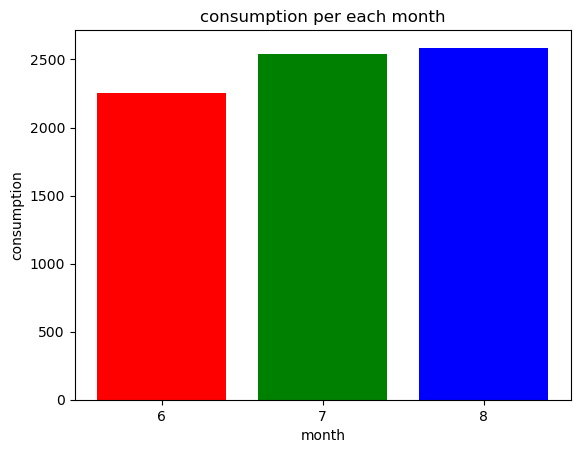

In [22]:
plt.bar([6,7,8],train_df.groupby('month')['power_consumption'].mean(),color=['red', 'green', 'blue'])
plt.xticks([6,7,8])
plt.title('consumption per each month')
plt.xlabel('month')
plt.ylabel('consumption')
plt.show()

In [59]:
def consumption_per_month(df):
    plt.bar([6,7,8],df.groupby('month')['power_consumption'].mean(),color=['red', 'green', 'blue'])
    plt.xticks([6,7,8])
    plt.title('consumption per each month')
    plt.xlabel('month')
    plt.ylabel('consumption')
    return plt.show()

In [23]:
train_df['day_of_year'] = train_df['date_time'].dt.dayofyear

In [24]:
train_df

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,year,month,day,hour,day_of_year
0,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,0.0,0.0,1085.28,2022,6,1,0,152
1,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,0.0,0.0,1047.36,2022,6,1,1,152
2,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,0.0,0.0,974.88,2022,6,1,2,152
3,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,0.0,0.0,953.76,2022,6,1,3,152
4,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,0.0,0.0,986.40,2022,6,1,4,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,0.5,0.0,881.04,2022,8,24,19,236
203996,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,0.0,0.0,798.96,2022,8,24,20,236
203997,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,0.0,0.0,825.12,2022,8,24,21,236
203998,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,0.0,0.0,640.08,2022,8,24,22,236


In [25]:
train_df.groupby('day_of_year')['power_consumption'].mean()

day_of_year
152    1936.616092
153    2243.377985
154    2283.129571
155    2043.257083
156    1926.382933
          ...     
232    2389.715438
233    2291.558770
234    2620.167881
235    2626.759821
236    2526.748776
Name: power_consumption, Length: 85, dtype: float64

# 각 요일 별 에너지 사용량 -> 주말이 좀 떨어지긴 함. but 유의미?

In [26]:
train_df['weekday'] = train_df['date_time'].dt.day_name()

In [27]:
data = train_df.groupby('weekday')['power_consumption'].mean()

<BarContainer object of 7 artists>

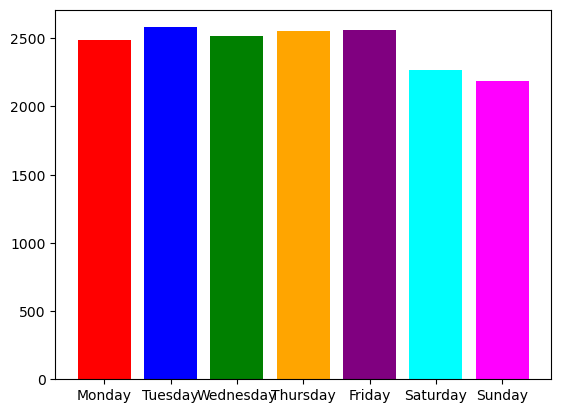

In [28]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data = data.sort_index(key=lambda x: x.map({key: idx for idx, key in enumerate(weekday_order)}))
color_list = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']
plt.bar(weekday_order,data, color = color_list)

In [61]:
def consumption_per_1week(df):
    data = train_df.groupby('weekday')['power_consumption'].mean()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    data = data.sort_index(key=lambda x: x.map({key: idx for idx, key in enumerate(weekday_order)}))
    color_list = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']
    return plt.bar(weekday_order,data, color = color_list)

# 0601부터 0824까지 에너지 소비량 -> 급락 부분은 주말

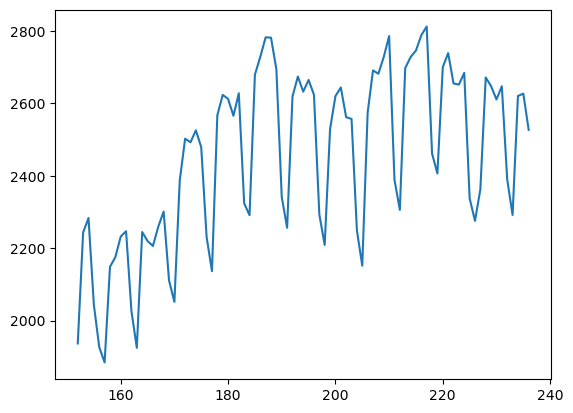

In [29]:
plt.plot(train_df.groupby('day_of_year')['power_consumption'].mean())
plt.show()

In [63]:
def consumption_per_day(df):
    plt.plot(df.groupby('day_of_year')['power_consumption'].mean())
    return plt.show()

# 6-8월 주말 주중 비교

In [8]:
def get_weekend_weekday():
    train_df = pd.read_csv('./train.csv')
    train_df = train_df.fillna(0)
    train_df = train_df.rename(columns={
        '건물번호': 'building_number',
        '일시': 'date_time',
        '기온(C)': 'temperature',
        '강수량(mm)': 'rainfall',
        '풍속(m/s)': 'windspeed',
        '습도(%)': 'humidity',
        '일조(hr)': 'sunshine',
        '일사(MJ/m2)': 'solar_radiation',
        '전력소비량(kWh)': 'power_consumption'
    })
    train_df.drop('num_date_time', axis = 1, inplace=True)
    
    train_holiday_lst = ['2022-06-04',
                         '2022-06-05',
                         '2022-06-06',
                         '2022-06-11',
                         '2022-06-12',
                         '2022-06-18',
                         '2022-06-19',
                         '2022-06-25',
                         '2022-06-26',
                         '2022-07-02',
                         '2022-07-03',
                         '2022-07-09',
                         '2022-07-10',
                         '2022-07-16',
                         '2022-07-17',
                         '2022-07-23',
                         '2022-07-24',
                         '2022-07-30',
                         '2022-07-31',
                         '2022-08-06',
                         '2022-08-07',
                         '2022-08-13',
                         '2022-08-14',
                         '2022-08-15',
                         '2022-08-20',
                         '2022-08-21']
    from datetime import datetime
    # Convert date strings to datetime.date objects
    train_holiday_lst = [datetime.strptime(date_str, '%Y-%m-%d').date() for date_str in train_holiday_lst]

    train_df['date_time'] = pd.to_datetime(train_df['date_time'])
    train_df['year'] = train_df['date_time'].dt.year
    train_df['month'] = train_df['date_time'].dt.month
    train_df['day'] = train_df['date_time'].dt.day
    train_df['hour'] = train_df['date_time'].dt.hour
    train_df['day_of_year'] = train_df['date_time'].dt.dayofyear
    train_df['weekday'] = train_df['date_time'].dt.day_name()
    train_df['date_time'] = train_df['date_time'].dt.date
    df = train_df
    weekend_df = df[df['date_time'].isin(train_holiday_lst)]
    weekday_df = df[~(df['date_time'].isin(train_holiday_lst))]
    return weekend_df, weekday_df

In [9]:
weekend_df, weekday_df = get_weekend_weekday()

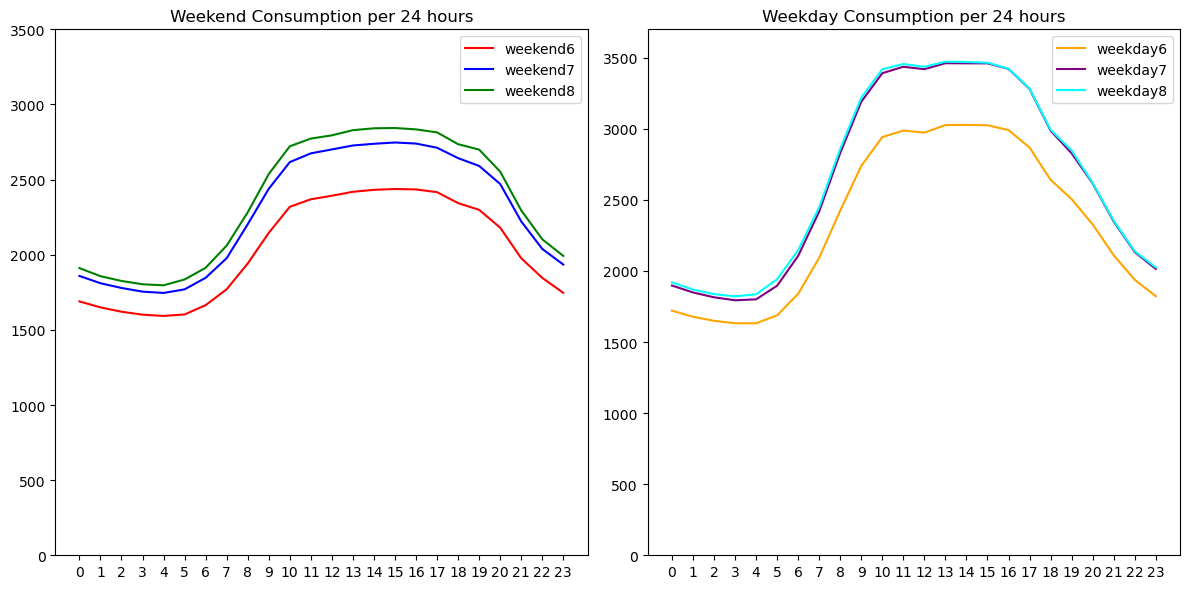

In [10]:
import matplotlib.pyplot as plt

# 주말 데이터와 주중 데이터를 시간대별로 평균 계산 후 그래프로 그리기
plt.figure(figsize=(12, 6))  # 그림 전체 크기 설정

# 주말 서브플롯 (1행 2열 중 첫 번째)
plt.subplot(1, 2, 1)
plt.plot(weekend_df[(weekend_df['month'] == 6)].groupby('hour')['power_consumption'].mean(), label='weekend6', color='red')
plt.plot(weekend_df[(weekend_df['month'] == 7)].groupby('hour')['power_consumption'].mean(), label='weekend7', color='blue')
plt.plot(weekend_df[(weekend_df['month'] == 8)].groupby('hour')['power_consumption'].mean(), label='weekend8', color='green')
plt.legend()
plt.xticks(list(range(24)))
plt.ylim(0, 3500)  # y축 최대값 설정
plt.title('Weekend Consumption per 24 hours')

# 주중 서브플롯 (1행 2열 중 두 번째)
plt.subplot(1, 2, 2)
plt.plot(weekday_df[(weekday_df['month'] == 6)].groupby('hour')['power_consumption'].mean(), label='weekday6', color='orange')
plt.plot(weekday_df[(weekday_df['month'] == 7)].groupby('hour')['power_consumption'].mean(), label='weekday7', color='purple')
plt.plot(weekday_df[(weekday_df['month'] == 8)].groupby('hour')['power_consumption'].mean(), label='weekday8', color='cyan')
plt.legend()
plt.xticks(list(range(24)))
plt.ylim(0, 3700)  # y축 최대값 설정
plt.title('Weekday Consumption per 24 hours')

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()


In [11]:
def compare_weekday_weekend(df):
    # 주말 데이터와 주중 데이터를 시간대별로 평균 계산 후 그래프로 그리기
    plt.figure(figsize=(12, 6))  # 그림 전체 크기 설정

    # 주말 서브플롯 (1행 2열 중 첫 번째)
    plt.subplot(1, 2, 1)
    plt.plot(weekend_df[(weekend_df['month'] == 6)].groupby('hour')['power_consumption'].mean(), label='weekend6', color='red')
    plt.plot(weekend_df[(weekend_df['month'] == 7)].groupby('hour')['power_consumption'].mean(), label='weekend7', color='blue')
    plt.plot(weekend_df[(weekend_df['month'] == 8)].groupby('hour')['power_consumption'].mean(), label='weekend8', color='green')
    plt.legend()
    plt.xticks(list(range(24)))
    plt.ylim(0, 3500)  # y축 최대값 설정
    plt.title('Weekend Consumption per 24 hours')

    # 주중 서브플롯 (1행 2열 중 두 번째)
    plt.subplot(1, 2, 2)
    plt.plot(weekday_df[(weekday_df['month'] == 6)].groupby('hour')['power_consumption'].mean(), label='weekday6', color='orange')
    plt.plot(weekday_df[(weekday_df['month'] == 7)].groupby('hour')['power_consumption'].mean(), label='weekday7', color='purple')
    plt.plot(weekday_df[(weekday_df['month'] == 8)].groupby('hour')['power_consumption'].mean(), label='weekday8', color='cyan')
    plt.legend()
    plt.xticks(list(range(24)))
    plt.ylim(0, 3700)  # y축 최대값 설정
    plt.title('Weekday Consumption per 24 hours')

    plt.tight_layout()  # 서브플롯 간 간격 조절
    return plt.show()

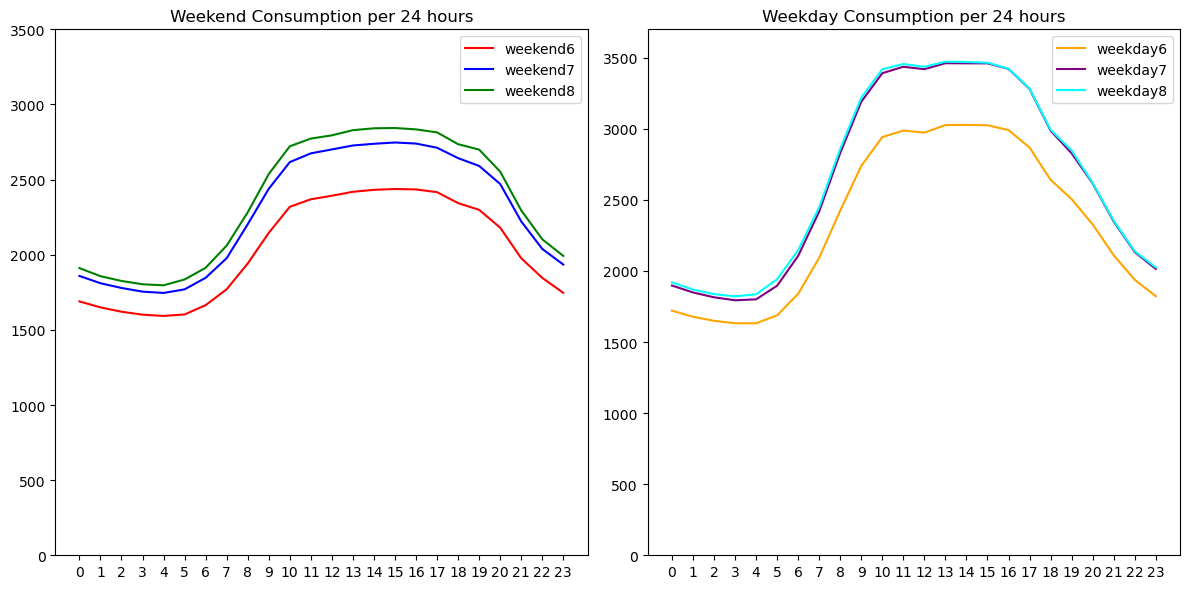

In [12]:
compare_weekday_weekend(train_df)

In [90]:
def consumption_per_1week(df):
    data = train_df.groupby('weekday')['power_consumption'].mean()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    data = data.sort_index(key=lambda x: x.map({key: idx for idx, key in enumerate(weekday_order)}))
    color_list = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']
    return plt.bar(weekday_order,data, color = color_list)

<BarContainer object of 7 artists>

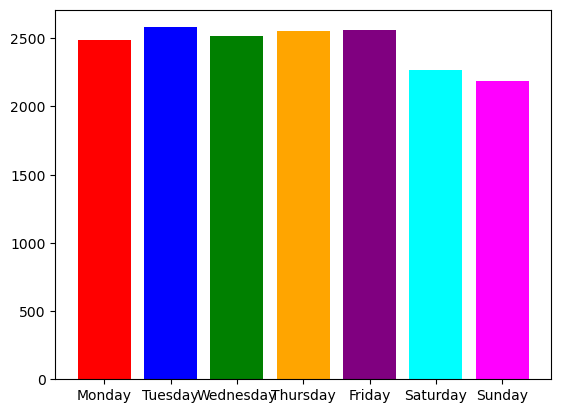

In [91]:
consumption_per_1week(train_df)

# 건물 별 에너지 사용

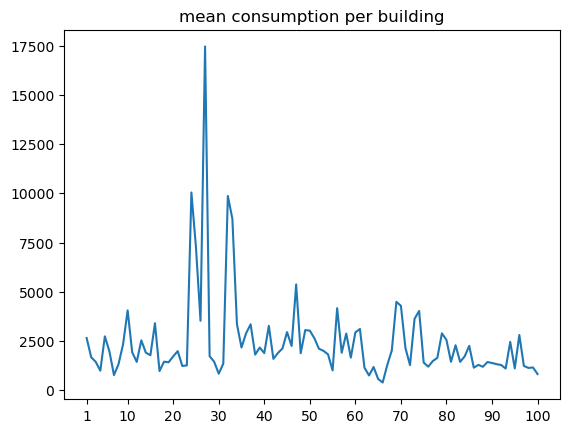

top 1: building 26, (mean : 17453)
top 2: building 23, (mean : 10043)
top 3: building 31, (mean : 9865)


In [37]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

train_df = train_df.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train_df = train_df.fillna(0)
train_df.drop('num_date_time', axis = 1, inplace=True)

train_df['date_time'] = pd.to_datetime(train_df['date_time'])
train_df['year'] = train_df['date_time'].dt.year
train_df['month'] = train_df['date_time'].dt.month
train_df['day'] = train_df['date_time'].dt.day
train_df['hour'] = train_df['date_time'].dt.hour
train_df['day_of_year'] = train_df['date_time'].dt.dayofyear
train_df['weekday'] = train_df['date_time'].dt.day_name()
train_df['date_time'] = train_df['date_time'].dt.date

lst = [train_df[train_df['building_number'] == i]['power_consumption'].mean() for i in range(1,101)]

plt.plot(list(range(1,101)), lst)
plt.xticks([1,10,20,30,40,50,60,70,80,90,100])
plt.gca().grid(False)
plt.title('mean consumption per building')
plt.show()

cnt = 0
for x in sorted(lst, reverse=True)[:3]:
    cnt += 1
    print('top {}: building {}, (mean : {})'.format(str(cnt), str(lst.index(x)), str(int(x))))

# building info

korean to eng

In [3]:
info = pd.read_csv('./building_info.csv')

In [4]:
korean_columns = ['건물번호', '건물유형', '연면적(m2)', '냉방면적(m2)', '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']
english_columns = ['Building_Number', 'Building_Type', 'Gross_Floor_Area(m2)', 'Cooling_Area(m2)', 'Solar_Capacity(kW)', 'ESS_Storage_Capacity(kWh)', 'PCS_Capacity(kW)']

lst = []
for x in english_columns:
    lst.append(x.lower())
info.columns = lst

In [6]:
info

,building_number,building_type,gross_floor_area(m2),cooling_area(m2),solar_capacity(kw),ess_storage_capacity(kwh),pcs_capacity(kw)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,-,-,-
96,97,호텔및리조트,55144.67,25880.00,-,-,-
97,98,호텔및리조트,53578.62,17373.75,-,-,-
98,99,호텔및리조트,53499.00,40636.00,-,-,-


# 1. gross_floor_area(m2)

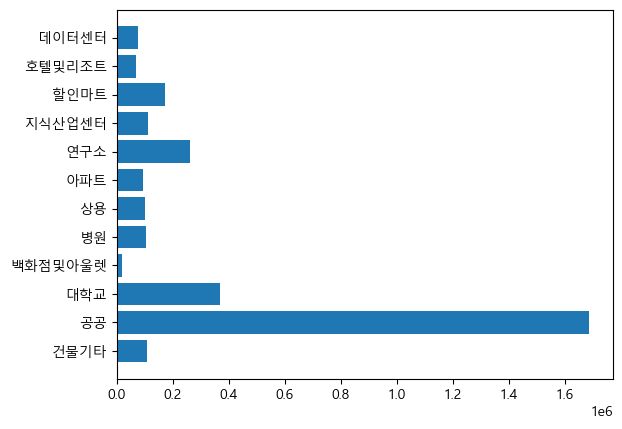

In [10]:
plt.barh(info['building_type'].value_counts().index.tolist(),info.groupby('building_type')['gross_floor_area(m2)'].mean())
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

# 공공이 혼자 튀므로 공공으로 다 나눠주기

In [12]:
gross = info.groupby('building_type')['gross_floor_area(m2)'].mean()/max(info.groupby('building_type')['gross_floor_area(m2)'].mean())

In [13]:
for idx, value in dict(gross).items():
    info.loc[info['building_type'] == idx,'gross_floor_area(m2)'] = value

In [14]:
info

,building_number,building_type,gross_floor_area(m2),cooling_area(m2),solar_capacity(kw),ess_storage_capacity(kwh),pcs_capacity(kw)
0,1,건물기타,0.064257,39570.00,-,-,-
1,2,건물기타,0.064257,99000.00,-,-,-
2,3,건물기타,0.064257,113950.00,40,-,-
3,4,건물기타,0.064257,34419.62,60,-,-
4,5,건물기타,0.064257,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,0.044962,60500.00,-,-,-
96,97,호텔및리조트,0.044962,25880.00,-,-,-
97,98,호텔및리조트,0.044962,17373.75,-,-,-
98,99,호텔및리조트,0.044962,40636.00,-,-,-


# 2. cooling_area(m2)

<BarContainer object of 12 artists>

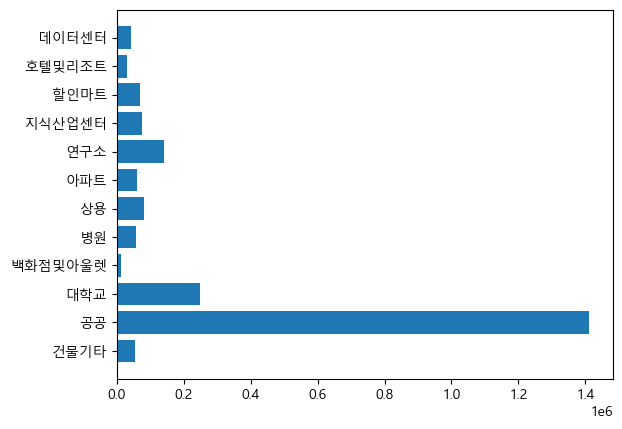

In [15]:
plt.barh(info['building_type'].value_counts().index.tolist(),info.groupby('building_type')['cooling_area(m2)'].mean())

# cooling도 마찬가지로 공공이 튀므로 다 나눠주기

In [18]:
cooling = info.groupby('building_type')['cooling_area(m2)'].mean()/max(info.groupby('building_type')['cooling_area(m2)'].mean())
for idx, value in dict(cooling).items():
    info.loc[info['building_type'] == idx,'cooling_area(m2)'] = value

In [19]:
info

,building_number,building_type,gross_floor_area(m2),cooling_area(m2),solar_capacity(kw),ess_storage_capacity(kwh),pcs_capacity(kw)
0,1,건물기타,0.064257,0.038372,-,-,-
1,2,건물기타,0.064257,0.038372,-,-,-
2,3,건물기타,0.064257,0.038372,40,-,-
3,4,건물기타,0.064257,0.038372,60,-,-
4,5,건물기타,0.064257,0.038372,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,0.044962,0.029095,-,-,-
96,97,호텔및리조트,0.044962,0.029095,-,-,-
97,98,호텔및리조트,0.044962,0.029095,-,-,-
98,99,호텔및리조트,0.044962,0.029095,-,-,-


# solar_capacity(kw)

In [21]:
info['solar_capacity(kw)'].value_counts()

-         64
25         2
20         2
50         2
200        2
28.44      1
3          1
9.45       1
365        1
14.4       1
65         1
95         1
60.45      1
621        1
100        1
97.85      1
98.28      1
46.2       1
35         1
100.56     1
40         1
83.72      1
30         1
26.64      1
97.65      1
110        1
70         1
64.8       1
56         1
130.6      1
447.2      1
60         1
21.6       1
Name: solar_capacity(kw), dtype: int64

상관관계가 하나도 없어 보이므로 결측치 -> 0

In [24]:
info['solar_capacity(kw)'] = info['solar_capacity(kw)'].replace('-',0)
info['solar_capacity(kw)'] = info['solar_capacity(kw)'].astype(float)

<BarContainer object of 100 artists>

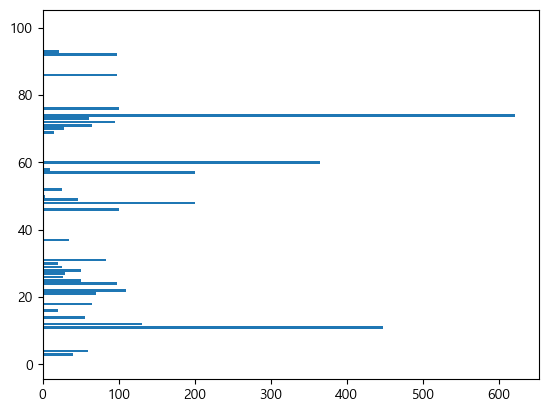

In [25]:
plt.barh(list(range(1,101)),info['solar_capacity(kw)'])

# 이 역시 건물별로 튀는 부분이 많으므로 max값으로 다 나눠주어 안정화

In [26]:
info['solar_capacity(kw)'] = info['solar_capacity(kw)']/max(info['solar_capacity(kw)'])

In [27]:
info

,building_number,building_type,gross_floor_area(m2),cooling_area(m2),solar_capacity(kw),ess_storage_capacity(kwh),pcs_capacity(kw)
0,1,건물기타,0.064257,0.038372,0.000000,-,-
1,2,건물기타,0.064257,0.038372,0.000000,-,-
2,3,건물기타,0.064257,0.038372,0.064412,-,-
3,4,건물기타,0.064257,0.038372,0.096618,-,-
4,5,건물기타,0.064257,0.038372,0.000000,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,0.044962,0.029095,0.000000,-,-
96,97,호텔및리조트,0.044962,0.029095,0.000000,-,-
97,98,호텔및리조트,0.044962,0.029095,0.000000,-,-
98,99,호텔및리조트,0.044962,0.029095,0.000000,-,-


# 나머지도 그대로 진행

In [31]:
info['ess_storage_capacity(kwh)'] = info['ess_storage_capacity(kwh)'].replace('-',0)
info['ess_storage_capacity(kwh)'] = info['ess_storage_capacity(kwh)'].astype(float)
info['ess_storage_capacity(kwh)'] = info['ess_storage_capacity(kwh)']/max(info['ess_storage_capacity(kwh)'])

info['pcs_capacity(kw)'] = info['pcs_capacity(kw)'].replace('-',0)
info['pcs_capacity(kw)'] = info['pcs_capacity(kw)'].astype(float)
info['pcs_capacity(kw)'] = info['pcs_capacity(kw)']/max(info['pcs_capacity(kw)'])

In [35]:
info

,building_number,building_type,gross_floor_area(m2),cooling_area(m2),solar_capacity(kw),ess_storage_capacity(kwh),pcs_capacity(kw)
0,1,건물기타,0.064257,0.038372,0.000000,0.000000,0.0
1,2,건물기타,0.064257,0.038372,0.000000,0.000000,0.0
2,3,건물기타,0.064257,0.038372,0.064412,0.000000,0.0
3,4,건물기타,0.064257,0.038372,0.096618,0.000000,0.0
4,5,건물기타,0.064257,0.038372,0.000000,0.824839,1.0
...,...,...,...,...,...,...,...
95,96,호텔및리조트,0.044962,0.029095,0.000000,0.000000,0.0
96,97,호텔및리조트,0.044962,0.029095,0.000000,0.000000,0.0
97,98,호텔및리조트,0.044962,0.029095,0.000000,0.000000,0.0
98,99,호텔및리조트,0.044962,0.029095,0.000000,0.000000,0.0


In [38]:
info.to_csv('./building_info_ver1.csv', index = False)